First mount the drive so that model can strore in drive.

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change directory of mounted drive

In [ ]:
cd '/content/drive/My Drive/Flower-Classi1'

/content/drive/My Drive/Flower-Classi1


Load the dataset from the website

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2020-07-21 07:30:58--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  48.3MB/s    in 7.0s    

2020-07-21 07:31:05 (47.1 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2020-07-21 07:35:14--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502
Saving to: ‘imagelabels.mat.2’

imagelabels.mat.2   100%[===================>]     502  --.-KB/s    in 0s      

2020-07-21 07:35:14 (68.5 MB/s) - ‘imagelabels.mat.2’ saved 

Import required modules and libraries

In [ ]:
import os
import numpy as np
import scipy.io
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Now start preprocessing of data

In [ ]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

resize images using **opencv**

In [ ]:
train_x = []
train_y = []
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  train_y.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (150,150))
  normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
                            norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  train_x.append(normalized_img)
train_x = np.array(train_x)

Split dataset into two parts training dataset and validation dataset and print the shape

In [ ]:
trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=0.15, random_state=10)

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960


To make easier and convergable normalize all images 

In [ ]:
training_images= trainx/255.0
test_images=valx/255.0
 
training_images = trainx.reshape((6960,150,150,3))
valx = valx.reshape((1229,150,150,3))
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))
print('Test Dataset Shape: {}'.format(valx.shape))
print('No. of Test Dataset Labels: {}'.format(len(valy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960
Test Dataset Shape: (1229, 150, 150, 3)
No. of Test Dataset Labels: 1229


Categorize data

In [ ]:
trainy = to_categorical(trainy)
valy = to_categorical(valy)

Save the validation dataset for test

In [ ]:
print(type(test_images))
print(type(valy))
from numpy import save
save('test_images.npy', test_images)
save('test_lables.npy',trainy)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


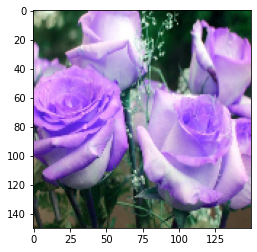

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[123])
print(trainy[123])

Build the model and train

In [ ]:
 
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
 
#add model layers
 
 
model = Sequential()
# #Layer 1
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(150, 150, 3),strides=(2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
 
# #Layer 2
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
# #Layer 3
 
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
# #Layer 4
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
# #Input to Neural Network is flattened
model.add(Flatten())
# #1st hidden layer with 512 neurons/nodes
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
# #Output layer with 102 nodes for classifying 102 flowers
model.add(Dense(102, activation='softmax'))
 
"""## Compiling and Training the Neural Network"""
 
#Compile the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
 
#Train the network
model.fit(trainx, trainy, validation_data = (valx, valy), epochs=80, batch_size=200)

Train on 6960 samples, validate on 1229 samples
Epoch 1/80
6960/6960 [==============================] - 7s 1ms/step - loss: 4.5512 - accuracy: 0.0276 - val_loss: 4.5021 - val_accuracy: 0.0488
Epoch 2/80
6960/6960 [==============================] - 7s 960us/step - loss: 4.2960 - accuracy: 0.0471 - val_loss: 4.1395 - val_accuracy: 0.0602
Epoch 3/80
6960/6960 [==============================] - 7s 953us/step - loss: 3.9910 - accuracy: 0.0714 - val_loss: 3.8375 - val_accuracy: 0.1009
Epoch 4/80
6960/6960 [==============================] - 7s 957us/step - loss: 3.7822 - accuracy: 0.0874 - val_loss: 3.7370 - val_accuracy: 0.1196
Epoch 5/80
6960/6960 [==============================] - 7s 956us/step - loss: 3.6098 - accuracy: 0.1148 - val_loss: 3.5672 - val_accuracy: 0.1253
Epoch 6/80
6960/6960 [==============================] - 7s 959us/step - loss: 3.4311 - accuracy: 0.1445 - val_loss: 3.3179 - val_accuracy: 0.1725
Epoch 7/80
6960/6960 [==============================] - 7s 954us/step - loss: 

Save the model

In [ ]:
model.save('model.h5')
print('model saved')

model saved


Load the model and test on dataset

In [ ]:
from keras.models import load_model
model = load_model("model.h5")
 
score = model.evaluate(valx, valy)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
 
#Predict output on sample input data
pred = model.predict(valx) 
pred = np.argmax(pred, axis = 1)[:10] 
label = np.argmax(valy,axis = 1)[:10] 
 
print("Predicted labels:",pred) 
print("Actual Labels:   ",label)

1229/1229 [==============================] - 1s 656us/step
Test loss: 1.5616647425078105
Test accuracy: 0.6672090888023376
Predicted labels: [11 35  7 64 11 11 86 35 87 23]
Actual Labels:    [11 35  7 64 11 11 93 35 87 26]


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 74, 74, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 35, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      